In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, fbeta_score


df = pd.read_csv('GeneralDatensatz18-21ohneGeo-mitLockdown_mitCorona.csv', sep=';')

X=df[['UMONAT','USTUNDE','UWOCHENTAG','UART','USTRZUSTAND','BEZ','UTYP1','ULICHTVERH','IstRad','IstPKW','IstFuss','IstKrad','IstGkfz','IstSonstige', 'LOCKDOWN', 'COVID']]
#für tödliche Unfälle

# KFold-Konfiguration
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#für tödliche und schwere vs. leichte Unfälle  -> 1 ist schwer oder tödlich, 0 ist leicht
y = df['UKATEGORIE'].isin([1, 2]).astype(int)





In [2]:
# erstmal alle Parameter einzeln mit class weight 9 und fbeta mit beta = 2
beta = 2
fbeta_scorer= make_scorer(fbeta_score, beta=beta)
class_weight_optimiert = {0:1, 1: 9}


max_index = 0
max_score = 0
number_trees = []
results = []



for i in range (1, 1000, 5):
    rf_clas = RandomForestClassifier(n_estimators=i, max_depth = 5, random_state=42, class_weight=class_weight_optimiert)
    result_fbeta = cross_val_score(rf_clas, X, y, cv=kf, scoring=fbeta_scorer)
    if result_fbeta.mean() > max_score: 
        max_index = i
        max_score = result_fbeta.mean()
        print(f"bester score bei: {i} bäumen")
    number_trees.append(i)
    results.append(result_fbeta.mean())
    print(f"Fbeta-score mit {i} bäumen:", result_fbeta.mean())





bester score bei: 1 bäumen
Fbeta-score mit 1 bäumen: 0.47409964847302727
bester score bei: 6 bäumen
Fbeta-score mit 6 bäumen: 0.49204124665313004
bester score bei: 11 bäumen
Fbeta-score mit 11 bäumen: 0.49468051515160694
bester score bei: 16 bäumen
Fbeta-score mit 16 bäumen: 0.4968604767464025
bester score bei: 21 bäumen
Fbeta-score mit 21 bäumen: 0.49709491009181334
Fbeta-score mit 26 bäumen: 0.495437509604303
Fbeta-score mit 31 bäumen: 0.49559677414926717
Fbeta-score mit 36 bäumen: 0.4962733521647036
Fbeta-score mit 41 bäumen: 0.4968037831080423
Fbeta-score mit 46 bäumen: 0.496996799022593
bester score bei: 51 bäumen
Fbeta-score mit 51 bäumen: 0.49718645076649004
bester score bei: 56 bäumen
Fbeta-score mit 56 bäumen: 0.49733753700543504
Fbeta-score mit 61 bäumen: 0.4973169508422025
bester score bei: 66 bäumen
Fbeta-score mit 66 bäumen: 0.49742900199880713
Fbeta-score mit 71 bäumen: 0.4969009177885174
Fbeta-score mit 76 bäumen: 0.49729032256353084
Fbeta-score mit 81 bäumen: 0.49705385

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


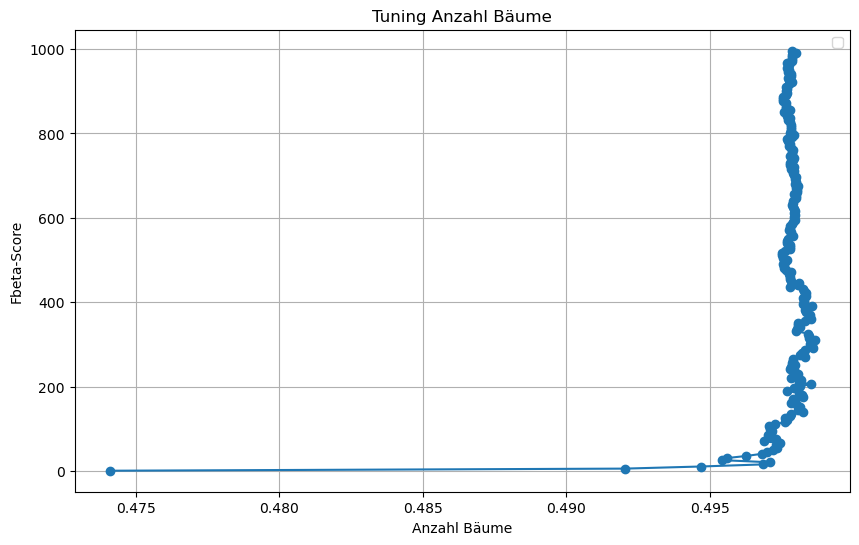

In [3]:
from matplotlib import pyplot as plt

# F1-Scores plotten
plt.figure(figsize=(10, 6))
plt.plot(number_trees, results)

plt.title('Tuning Anzahl Bäume')
plt.xlabel('Anzahl Bäume')
plt.ylabel('Fbeta-Score')
plt.legend()
plt.grid(True)
plt.show()

In [4]:

result_array= np.array(results)

In [5]:
max = np.argmax(result_array)

In [6]:
max

62